### Project - Finding Optimal PEEP from measurement data
Author: Wei-Teng Kao, ge32gak@mytum.de

Please prepare the required files for the algorithm
1. For finding Peaks
- pressure data (```.csv``` file)
- flow data (```.csv``` file)
1. For ```CreateXML()``` function: 
- Corresponding ```.pvtu``` data, if running for simulation case
- Corresponding ```.vtu``` data, if running for simulation case
- Corresponding ```config_template.json```
1. For the holo-shed algorithm, please check [holo-shed](https://gitlab.com/xenotaph3/holoshed) for further information
- Corresponding ```.eit``` data, please input to ```01_input``` folder
- Config file (```.json``` file), generated by ```CreateXML()``` function, please input to ```00_config``` folder
- Correspoding measured data (50Hz) (```.csv```file)
- Correspoding mesh file
1. For finding optimal PEEP
- output EIT data (```.txt``` file)of each pressure level, generated by holo-shed algorithm.
- pressure data (```.csv``` file), same as the one for finding Peaks
- flow data (```.csv``` file), same as the one for finding Peaks

#### Flow Chart

1. Modify the csv file
    - Modify the csv file, change the first columns from "Timestamp" to "time" and make sure time interval follow the correct frequency. 
    - please don't overwrite the origianl data, it will also be used later.
    
    ![Date](/imag_for_example/Date.png)
    
    ![time](/imag_for_example/Time.png)
    


2. Import the library

In [2]:
import sys
import os 
sys.path.append('../')

# Import the library 
import PEEP_Ppleateau_detect_lib as PPD
import OptimalPEEP_lib as OP

3. Specify the ```stat``` / ```end``` time and import the ```.csv``` file
   - In order to find the PEEP and P-Plateau for decremental PEEP trial, pressure and flow data are required
   - Please import the csv file that is modified with the title of first columns names: ```Time```

In [3]:
#Specify the starting "time" and ending "time". Notice the unit here is time(s), not index(frame)
start = 1000
end = 1309

- 3.1 Specify the ```stat``` / ```end``` time
  
    ![Start_End_time](/imag_for_example/StartEndTime.png)

    1. In order to find the correct peaks for simulation, the first peak of each pressure level **has to** be loacted at the PEEP,not the P-Plateau, meaning the started time frame should be choosed wisely between the P-plateau and PEEP. For Tthe last peak, it should be loacted at the P-plateau, so the ended time frame wll be between the PEEP and P_plateau. Here in the example, ```start_time = 1000, end_time = 1309```.
    2. The peaks denoted by star symbol are the peaks will be used for further analysis. e.g. In the next step, Create the necessary files for the holo-shed algorithm, the index of those peaks are selected for generating the ```.json```files. 

- 3.2 Import the ```.csv``` file

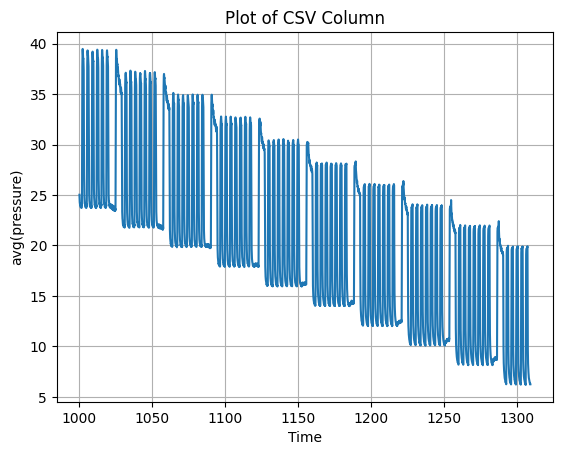

In [4]:
#Import pressrue data
directory_pressure = os.getcwd() + "/required_csv_file"
filename_pressure = 'realtimeValues_20210707094239_time.csv'
csv_file_path_pressrue = os.path.join(directory_pressure, filename_pressure)
result_P, index_P = PPD.store_csv_column(csv_file_path_pressrue, detect_label='Pressure [mbar]', initial_time = 0, start_time = start, end_time = end,frquency = 50, plot_=True)

#Import flow data
directory_flow = os.getcwd() + "/required_csv_file"
filename_flow = 'realtimeValues_20210707094239_time.csv'
csv_file_path_flow = os.path.join(directory_flow, filename_flow)
result_F, index_F = PPD.store_csv_column(csv_file_path_flow, detect_label='Flow [l/min]' , initial_time = 0, start_time = start, end_time = end,frquency = 50, plot_=False)


4. Initialize ```ExtractPVDandPressure()``` and find the upper and lower peak by calling ```self.find_peak()```

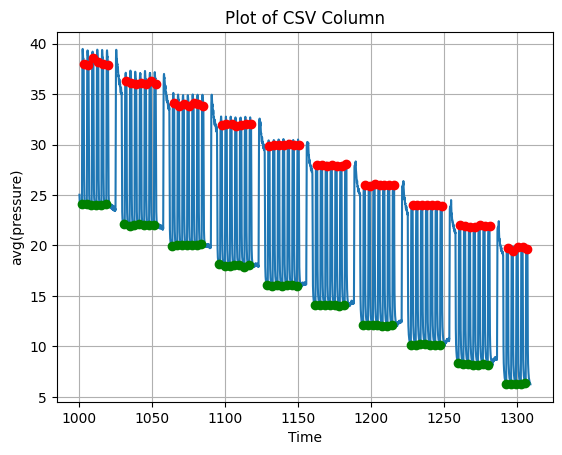

In [5]:
#Find Peak value
patient = PPD.ExtractPVDandPressure(result_P,result_F,50)
upperPeak,lowerPeak = patient.find_peak( rm_unnecessary_pressure= True, time_over = 3.5,plot_= True, plot_all_= False)

In [6]:
#Only use for generating the essential files for holo-shed algorithm
patient.createXMLfile(
    "directory that you store the original PVTU and VTU files",  # useless if run for measurement data
    os.path.dirname(os.getcwd()),  # config template dir
    "config_file_meas_template.json",  # config template name
    os.getcwd() + "/generate_file_optimalPEEP", # Output dir 
    "output_SMART2.pvd" #Output name, only for simulation case, useless for measurement data
    ,shift=0
    ,createPVD = False
    ,transfer2VTU= False    # if true, combine the  PVD files from all each post-preocssor in one VTU file
    ,createConfig_sim= False   # if true,generate the config file for sim case, please using the correct config template.
    ,createConfig_meas = True  # if true,generate the config file for meas case, please using the correct config template.
    ,limit_sim = [20360, 24860]
    ,limit_meas = [0,-1])

level_ 0 :  [1001.64 1002.84 1004.88 1006.18 1007.96 1009.24 1011.6  1012.84 1014.96
 1016.18 1018.22 1019.52]
level_ 1 :  [1030.64 1032.04 1034.32 1035.52 1037.64 1038.86 1040.7  1042.14 1044.32
 1045.52 1047.4  1048.7  1051.   1052.2 ]
level_ 2 :  [1063.64 1064.84 1066.94 1068.18 1070.02 1071.38 1073.54 1074.84 1076.98
 1078.18 1080.32 1081.52 1083.5  1084.86]
level_ 3 :  [1095.96 1097.4  1099.66 1100.68 1103.   1104.2  1106.22 1107.52 1109.4
 1110.8  1113.   1114.2  1116.34 1117.54]
level_ 4 :  [1128.86 1130.2  1132.24 1133.48 1135.36 1136.74 1139.   1140.24 1142.34
 1143.52 1145.52 1146.78 1149.02 1150.24]
level_ 5 :  [1161.66 1162.82 1165.02 1166.2  1168.24 1169.56 1171.42 1172.92 1174.88
 1176.26 1178.18 1179.6  1181.3  1182.92]
level_ 6 :  [1194.36 1195.6  1197.62 1198.94 1200.84 1202.26 1204.22 1205.62 1207.58
 1208.94 1211.04 1212.28 1214.36 1215.62]
level_ 7 :  [1227.08 1228.28 1230.38 1231.62 1233.58 1234.96 1236.7  1238.3  1240.38
 1241.64 1243.68 1244.98 1246.9  1248.3 ]
l

In this example, 10 config json files is generated in user specific dir and named by the sequence of their level, e.g ```config_file_meas_0.json```. \
The plots showing the start/end peak of each pressure level will also be generated.

![Generate_plot](/generate_file_optimalPEEP/output_visualization_for_config_meas_0.png)

6. Find the average PEEP and Pressure_Plateau from each pressure level

In [7]:
# Final Step: finding the optimal PEEP
P_plateau = PPD.calculate_decremental_pressure(upperPeak , time_thershold =10,p_thershold= 1, NumValueCounted = -1, abandon_last=False)
PEEP = PPD.calculate_decremental_pressure(lowerPeak, time_thershold =10,p_thershold= 1, NumValueCounted = -1, abandon_last=False)

print('Pressure_Plateau : ', P_plateau)
print('PEEP : ',PEEP)

Pressure_Plateau :  [38.08101667 36.1149     33.96631429 31.97414286 29.9521     27.95872857
 25.98184286 23.9922     21.93642857 19.73225   ]
PEEP :  [24.0322     22.03261429 20.0418     18.02351429 16.05724286 14.07737143
 12.06981429 10.15688571  8.22288571  6.2848475 ]


7. Findinf the optimal PEEP by ```findOptimal()```.
   - **For more information to generate the ```EIT.txt``` file, please see README file.**
   - The input file are generated by the holoshed algoeithm, which are the flatten data of EIT image.
   - Please construct the input data as ```dict```, which the value are the path of each ```EIT.txt``` files.
   - When initialize ```findOptimal()```, the data is read only following the sequence of input dict, which means user can specify the key of dict as user wants, and has no impact on the result.

import the EIT value sucessfully
P_pleateau =  [38.08101667 36.1149     33.96631429 31.97414286 29.9521     27.95872857
 25.98184286 23.9922     21.93642857 19.73225   ]
PEEP =  [24.0322     22.03261429 20.0418     18.02351429 16.05724286 14.07737143
 12.06981429 10.15688571  8.22288571  6.2848475 ]
initialized sucessfully
calculate compliance sucessfully
calculate percentage sucessfully
find optimal sucessfully


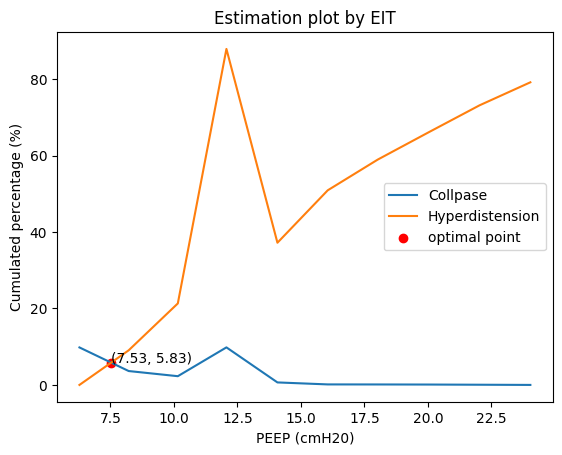

In [8]:
dir = os.getcwd() + "/generate_file_Holoshed"

#please formate the input file as following
file_path_dict = {
    'level_0': os.path.join(dir,"output_EIT_meas_0.txt"),
    'level_1': os.path.join(dir,"output_EIT_meas_1.txt"),
    'level_2': os.path.join(dir,"output_EIT_meas_2.txt"),
    'level_3': os.path.join(dir,"output_EIT_meas_3.txt"),
    'level_4': os.path.join(dir,"output_EIT_meas_4.txt"),
    'level_5': os.path.join(dir,"output_EIT_meas_5.txt"),
    'level_6': os.path.join(dir,"output_EIT_meas_6.txt"),
    'level_7': os.path.join(dir,"output_EIT_meas_7.txt"),
    'level_8': os.path.join(dir,"output_EIT_meas_8.txt"),
    'level_9': os.path.join(dir,"output_EIT_meas_9.txt"),
}

#the 
OP.findOptimal(file_path_dict ,P_plateau*100, PEEP*100,'avg',-1,True )